In [183]:
import numpy as np
import pandas as pd

In [184]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [185]:
match.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [186]:
match['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [187]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [188]:
match.shape

(756, 18)

In [189]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [190]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [191]:
delivery['inning'].unique()

array([1, 2, 3, 4, 5])

In [192]:
delivery.shape

(179078, 21)

In [193]:
delivery.groupby(['match_id','inning'])['total_runs'].sum().reset_index()

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [194]:
total_score_df = delivery.groupby(['match_id','inning'])['total_runs'].sum().reset_index()

In [195]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [196]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [197]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on = 'id',right_on='match_id')

In [198]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [199]:
 match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [200]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Gujrat Titans',  
    'Lucknow Super Giants'
]

In [201]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Gujrat Lions','Gujrat Titans')
match_df['team2'] = match_df['team2'].str.replace('Gujrat Lions','Gujrat Titans')

match_df['team1'] = match_df['team1'].str.replace('Pune Warriors','Lucknow Super Giants')
match_df['team2'] = match_df['team2'].str.replace('Pune Warriors','Lucknow Super Giants')


In [202]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [203]:
match_df.shape

(686, 20)

In [204]:
match_df = match_df[match_df['dl_applied']==0]

In [205]:
match_df = match_df[['match_id','city','winner','total_runs','venue']]

In [206]:
delivery['batting_team'] = delivery['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

delivery['batting_team'] = delivery['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

delivery['batting_team'] = delivery['batting_team'].str.replace('Gujrat Lions','Gujrat Titans')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Gujrat Lions','Gujrat Titans')

delivery['batting_team'] = delivery['batting_team'].str.replace('Pune Warriors','Lucknow Super Giants')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Pune Warriors','Lucknow Super Giants')

In [207]:
delivery = delivery[delivery['batting_team'].isin(teams)]
delivery = delivery[delivery['bowling_team'].isin(teams)]

In [208]:
delivery_df = match_df.merge(delivery,on='match_id')

In [209]:
delivery_df.head()

,match_id,city,winner,total_runs_x,venue,inning,batting_team,bowling_team,over,ball,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [210]:
delivery_df = delivery_df[delivery_df['inning']==2]

In [211]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [212]:
 delivery_df['current_score']

125         1
126         1
127         1
128         3
129         7
         ... 
160227    152
160228    154
160229    155
160230    157
160231    157
Name: current_score, Length: 77596, dtype: int64

In [213]:
delivery_df['runs_left'] =  delivery_df['total_runs_x'] -  delivery_df['current_score']

In [214]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 +  delivery_df['ball'])

In [215]:
 delivery_df.head()

,match_id,city,winner,total_runs_x,venue,inning,batting_team,bowling_team,over,ball,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,0,4,0,4,NaN,NaN,NaN,7,200,115


In [216]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

In [217]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")

In [218]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

In [219]:
wickets = delivery_df.groupby('match_id')['player_dismissed']

In [220]:
wickets = wickets.cumsum().values

In [221]:
wickets

array([0, 0, 0, ..., 6, 6, 7])

In [222]:
delivery_df['wickets'] = 10-wickets

In [223]:
delivery_df.head() 

,match_id,city,winner,total_runs_x,venue,inning,batting_team,bowling_team,over,ball,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,4,0,4,0,NaN,NaN,7,200,115,10


In [224]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [225]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [226]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [227]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [228]:
final_df = delivery_df[['batting_team','bowling_team','venue','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [229]:
final_df = final_df.sample(final_df.shape[0])

In [230]:
final_df.sample()

,batting_team,bowling_team,venue,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
96622,Rajasthan Royals,Sunrisers Hyderabad,Feroz Shah Kotla,132,119,10,132,0.0,6.655462,1


In [231]:
final_df.isnull().sum()

batting_team    0
bowling_team    0
venue           0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
crr             0
rrr             7
result          0
dtype: int64

In [232]:
final_df.shape

(77596, 10)

In [233]:
final_df.dropna(inplace=True)

In [234]:
final_df.shape

(77589, 10)

In [235]:
final_df = final_df[final_df['balls_left']!=0]

In [236]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [237]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [238]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [239]:
X_train.head()

,batting_team,bowling_team,venue,runs_left,balls_left,wickets,total_runs_x,crr,rrr
67342,Royal Challengers Bangalore,Kings XI Punjab,"Punjab Cricket Association Stadium, Mohali",119,74,7,163,5.739130,9.648649
45415,Delhi Capitals,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",27,28,6,112,5.543478,5.785714
64684,Kolkata Knight Riders,Rajasthan Royals,Eden Gardens,120,112,10,131,8.250000,6.428571
125426,Mumbai Indians,Kolkata Knight Riders,Eden Gardens,13,11,7,187,9.577982,7.090909
27863,Chennai Super Kings,Rajasthan Royals,De Beers Diamond Oval,105,88,9,140,6.562500,7.159091


In [240]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [241]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','venue'])
]
    ,
    remainder='passthrough'
)

In [242]:
from sklearn.linear_model import LogisticRegression

In [243]:
from sklearn.ensemble import RandomForestClassifier

In [244]:
from sklearn.pipeline import Pipeline

In [245]:
pipe = Pipeline(
    steps=[
        ('step1',trf),
        ('step2',LogisticRegression(solver='liblinear'))
    ]
)

In [246]:
pipe.fit(X_train,y_train)

/home/anurag10/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team',
                                                   'venue'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [247]:
y_pred = pipe.predict(X_test)

In [248]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8326113661343506

In [249]:
pipe.predict_proba(X_test)[1]

array([0.04129339, 0.95870661])

In [250]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [253]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','venue','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    


In [254]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,52.1,47.9
10467,2,8,0,47.8,52.2
10473,3,1,0,51.9,48.1
10479,4,7,1,64.0,36.0
10485,5,12,0,55.0,45.0
10491,6,13,0,44.5,55.5
10497,7,9,0,39.1,60.9
10505,8,15,0,27.5,72.5
10511,9,7,0,25.1,74.9
10518,10,17,0,15.1,84.9


Text(0.5, 1.0, 'Target-178')

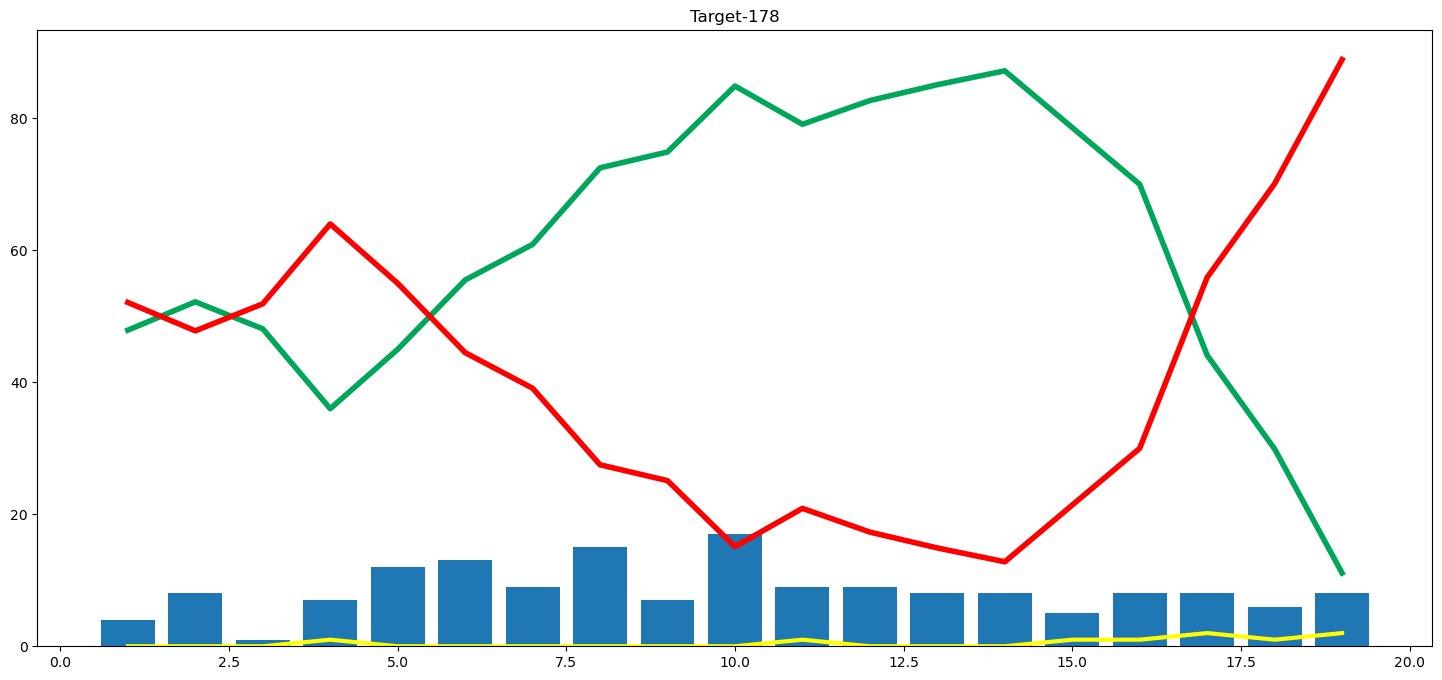

In [255]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [256]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Gujrat Titans',
 'Lucknow Super Giants']

In [258]:
delivery_df['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'M Chinnaswamy Stadium', 'Wankhede Stadium',
       'Holkar Cricket Stadium', 'Eden Gardens', 'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cri

In [259]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))